# データにラベル付けしてCNNで学習

## ラベル付け

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name = ["shina", "momo", "sora"]

In [3]:
# 教師データのラベル付け
X_train = [] 
Y_train = [] 
for i in range(len(name)):
    files = os.listdir("./data/train/" + name[i])
    print(len(files))
    for j in range(0, len(files)-1):
        n = os.path.join("./data/train/" + name[i] + "/", files[j])
        image = cv2.imread(n)
        b,g,r = cv2.split(image)
        image = cv2.merge([r,g,b])
        X_train.append(image)
        Y_train.append(i)

1295
1680
1225


In [4]:
# テストデータのラベル付け
X_test = [] # 画像データ読み込み
Y_test = [] # ラベル（名前）
for i in range(len(name)):
    files = os.listdir("./data/test/" + name[i])
    print(len(files))
    for j in range(0, len(files)-1):
        n = os.path.join("./data/test/" + name[i] + "/", files[j])
        image = cv2.imread(n)
        b,g,r = cv2.split(image)
        image = cv2.merge([r,g,b])
        X_test.append(image)
        Y_test.append(i)

10
10
10


## CNNで学習

In [5]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

/home/tatsuki/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
#行列に変換
X_train=np.array(X_train)
X_test=np.array(X_test)

In [7]:
#クラスベクトルになってる整数をクラス行列に変換
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [8]:
#CNN model MNISTのに近いけど上手くいかない
#model = Sequential()
#model.add(Conv2D(input_shape=(64, 64, 3), filters=32, kernel_size=(3, 3),
#                 strides=(1, 1), padding="same", activation='relu'))

#model.add(Conv2D(filters=32, kernel_size=(3, 3), 
#                 strides=(1, 1), padding="same", activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(filters=32, kernel_size=(3, 3), 
#                 strides=(1, 1), padding="same", activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Flatten())
#model.add(Dense(256))
#model.add(Activation("relu"))
#model.add(Dropout(0.5))
#model.add(Dense(3))
#model.add(Activation('softmax'))

In [9]:
#CNN model
model = Sequential()
model.add(Conv2D(input_shape=(64, 64, 3), filters=32,kernel_size=(3, 3), 
                 strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), 
                 strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), 
                 strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

In [10]:
#optimizer
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#学習
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=30, verbose=1, validation_data=(X_test, y_test))

Train on 4197 samples, validate on 27 samples
Epoch 1/30
4197/4197 [==============================] - 19s 5ms/step - loss: 1.0640 - acc: 0.4427 - val_loss: 1.0992 - val_acc: 0.3333
Epoch 2/30
4197/4197 [==============================] - 18s 4ms/step - loss: 1.0350 - acc: 0.4768 - val_loss: 1.0097 - val_acc: 0.6667
Epoch 3/30
4197/4197 [==============================] - 18s 4ms/step - loss: 0.9755 - acc: 0.5628 - val_loss: 0.9979 - val_acc: 0.5926
Epoch 4/30
4197/4197 [==============================] - 20s 5ms/step - loss: 0.9134 - acc: 0.6235 - val_loss: 1.1162 - val_acc: 0.3333
Epoch 5/30
4197/4197 [==============================] - 19s 5ms/step - loss: 0.8527 - acc: 0.6595 - val_loss: 0.9252 - val_acc: 0.6296
Epoch 6/30
4197/4197 [==============================] - 19s 5ms/step - loss: 0.7636 - acc: 0.7162 - val_loss: 0.9692 - val_acc: 0.5185
Epoch 7/30
4197/4197 [==============================] - 20s 5ms/step - loss: 0.7109 - acc: 0.7453 - val_loss: 0.7999 - val_acc: 0.5926
Epoch 8/3

In [12]:
#精度評価・表示
score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print('validation loss:{0[0]}\nvalidation accuracy:{0[1]}'.format(score))

validation loss:0.5359936356544495
validation accuracy:0.8148148059844971


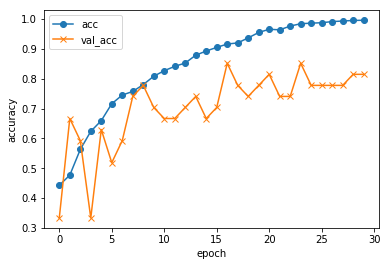

In [13]:
#acc, val_accのプロット
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

In [15]:
#モデルを保存
model.save("./data/1117_cnn_model.h5")